In [56]:
options(warn=-1)
library(lattice)
library(ggplot2)
library(Stat2Data)
library(mosaic)
data(MetroHealth83)

In [57]:
# Predict NumMDs from NumHospitals
head(MetroHealth83)

City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
"Holland-Grand Haven, MI",349,140,3,316,127,29533,8.3,11835,34135,13679,8.1,23165,2070,820,18.6815
"Louisville, KY-IN",4042,340,18,3909,328,173845,3.0,14606,202485,17013,3.0,118920,29017,2416,63.5767
"Battle Creek, MI",256,184,3,517,372,22972,2.4,16539,27245,19615,3.3,16645,4095,2945,16.0000
"Madison, WI",2679,510,7,1467,279,60530,5.2,11528,68705,13085,4.9,47085,6492,1221,51.7591
"Fort Smith, AR-OK",502,179,8,975,348,45185,4.6,16146,55370,19785,5.8,29415,9313,3301,22.4054
"Sarasota-Bradenton-Venice, FL",2352,371,7,1899,299,161625,2.5,25474,175580,27674,2.7,129855,7559,1160,48.4974


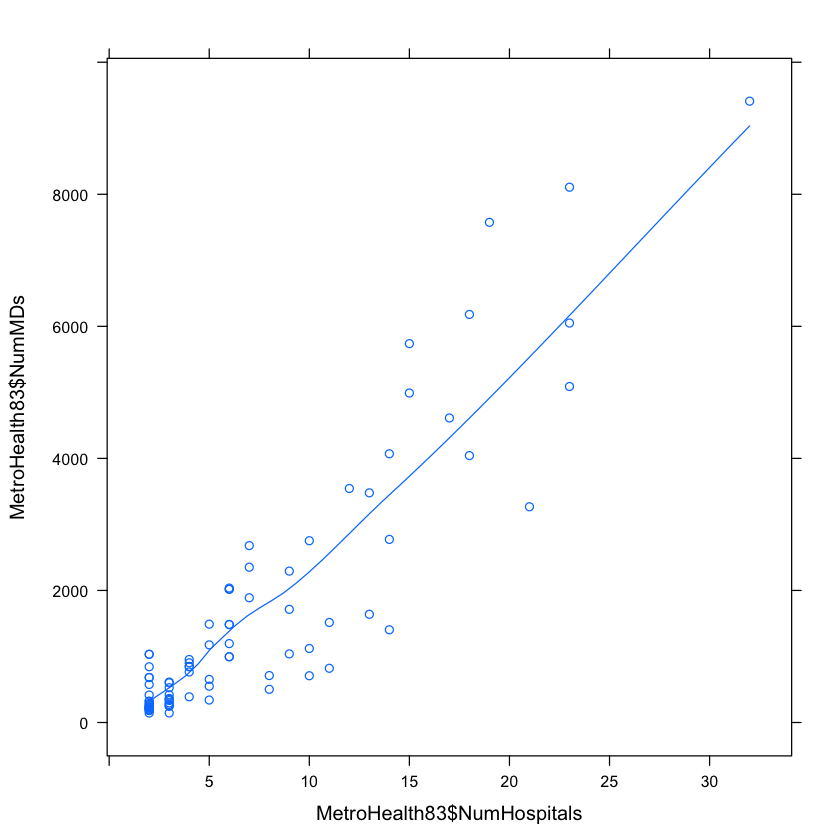

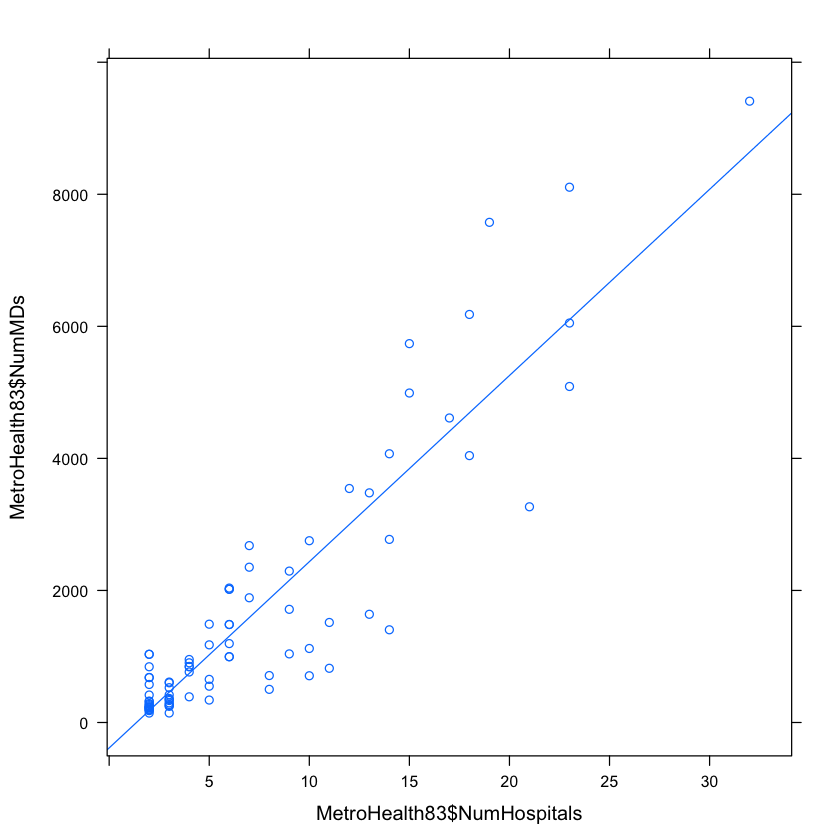

In [58]:
# Plots a smooth line that follows the data
xyplot(MetroHealth83$NumMDs ~ MetroHealth83$NumHospitals, type=c('p', 'smooth'))
# Plots regression line 
xyplot(MetroHealth83$NumMDs ~ MetroHealth83$NumHospitals, type=c('p', 'r'))

In [59]:
cor(MetroHealth83$NumMDs, MetroHealth83$NumHospitals) 

[1] 0.9084686

In [60]:
HospitalMDs.lm = lm(MetroHealth83$NumMDs ~ MetroHealth83$NumHospitals)
HospitalMDs.lm


Call:
lm(formula = MetroHealth83$NumMDs ~ MetroHealth83$NumHospitals)

Coefficients:
               (Intercept)  MetroHealth83$NumHospitals  
                    -385.1                       282.0  


Prediction equation: $\hat{y} = \beta_0 + \beta_1x$, where $\beta_0 = -385.1$ and $\beta_1 = 282.0$

In [61]:
msummary(HospitalMDs.lm)

                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -385.10     138.26  -2.785  0.00666 ** 
MetroHealth83$NumHospitals   282.01      14.42  19.563  < 2e-16 ***

Residual standard error: 833.2 on 81 degrees of freedom
Multiple R-squared:  0.8253,	Adjusted R-squared:  0.8232 
F-statistic: 382.7 on 1 and 81 DF,  p-value: < 2.2e-16

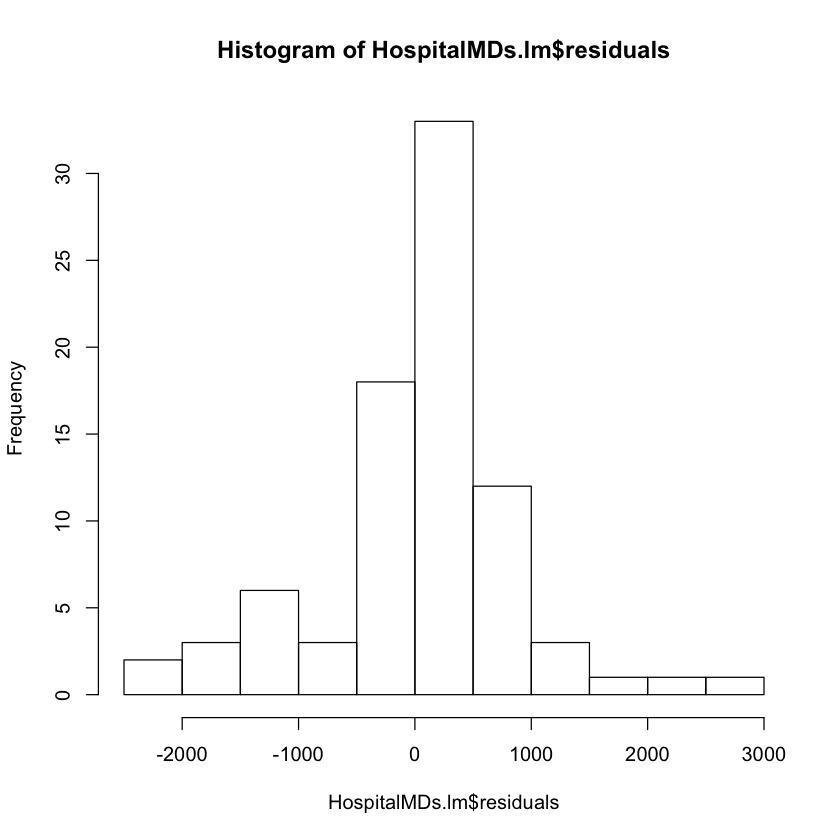

In [62]:
hist(HospitalMDs.lm$residuals)

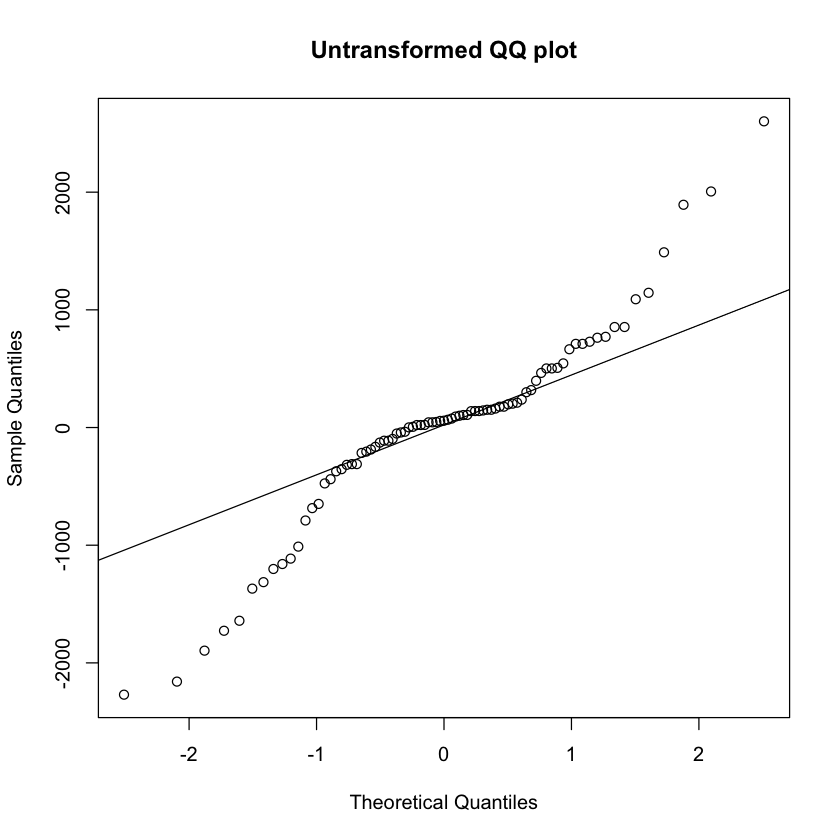

In [67]:
# ggtitle(label) # for the main title
# xlab(label) # for the x axis label
# ylab(label) # for the y axis label
# labs(...) # for the main title, axis labels and legend titles

qqnorm(HospitalMDs.lm$residuals, main='Untransformed QQ plot')
qqline(HospitalMDs.lm$residuals)


Call:
lm(formula = log(MetroHealth83$NumMDs) ~ MetroHealth83$NumHospitals)

Coefficients:
               (Intercept)  MetroHealth83$NumHospitals  
                     5.759                       0.145  

                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.75892    0.10046   57.32   <2e-16 ***
MetroHealth83$NumHospitals  0.14499    0.01047   13.84   <2e-16 ***

Residual standard error: 0.6054 on 81 degrees of freedom
Multiple R-squared:  0.7029,	Adjusted R-squared:  0.6992 
F-statistic: 191.6 on 1 and 81 DF,  p-value: < 2.2e-16


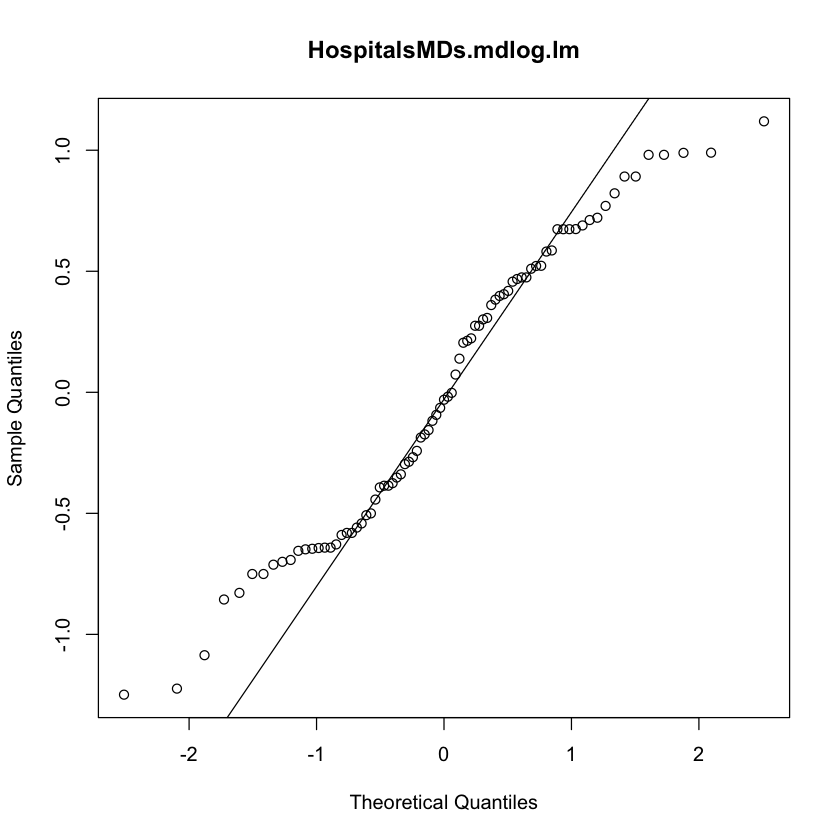

In [70]:
HospitalsMDs.mdlog.lm = lm(log(MetroHealth83$NumMDs) ~ MetroHealth83$NumHospitals)
print(HospitalsMDs.mdlog.lm)
print(msummary(HospitalsMDs.mdlog.lm))
qqnorm(HospitalsMDs.mdlog.lm$residuals, main = "HospitalsMDs.mdlog.lm")
qqline(HospitalsMDs.mdlog.lm$residuals)


Call:
lm(formula = tilde.data)

Coefficients:
               (Intercept)  MetroHealth83$NumHospitals  
                    14.033                       2.915  

                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 14.0329     1.4686   9.555 6.36e-15 ***
MetroHealth83$NumHospitals   2.9148     0.1531  19.036  < 2e-16 ***

Residual standard error: 8.85 on 81 degrees of freedom
Multiple R-squared:  0.8173,	Adjusted R-squared:  0.8151 
F-statistic: 362.4 on 1 and 81 DF,  p-value: < 2.2e-16


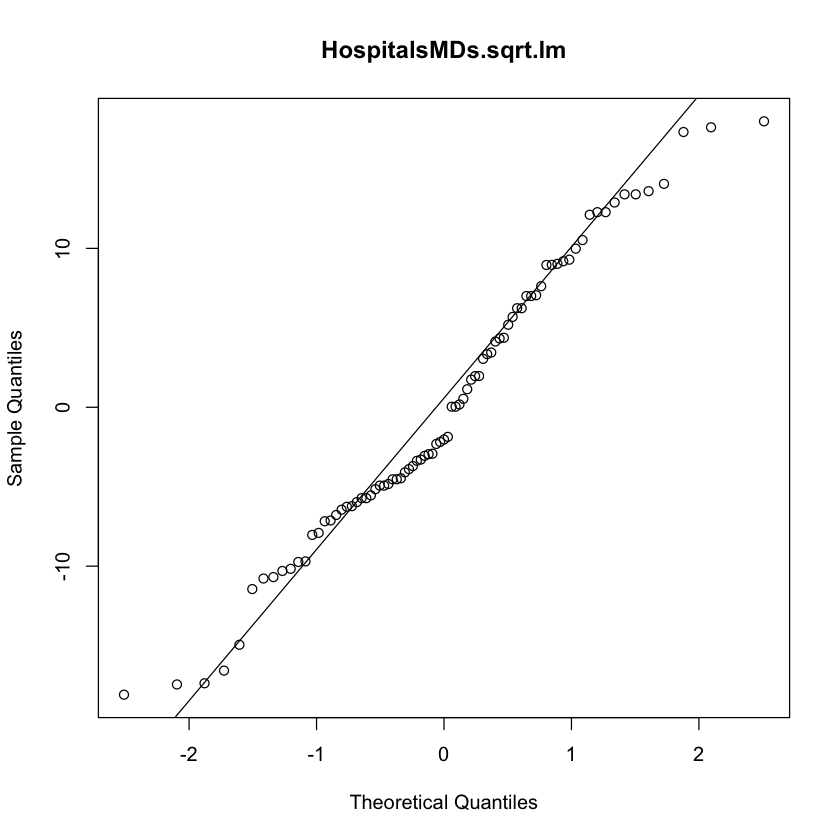

In [75]:
createLinearModel <- function(tilde.data) {
    HospitalsMDs.sqrt.lm = lm(tilde.data)
    print(HospitalsMDs.sqrt.lm)
    print(msummary(HospitalsMDs.sqrt.lm))
    qqnorm(HospitalsMDs.sqrt.lm$residuals, main = "HospitalsMDs.sqrt.lm")
    qqline(HospitalsMDs.sqrt.lm$residuals)
}
createLinearModel(sqrt(MetroHealth83$NumMDs) ~ MetroHealth83$NumHospitals)